#### Data Load

In [156]:
# Code origin by KJH3024 at GitHub

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # 경고 무시

pd.options.display.max_columns = None

# Load Data
df = pd.read_csv('../../csv_data/use/dataset3_2.csv', thousands=",", encoding='utf8')
df['회계년도'] = pd.to_datetime(df['회계년도'], format='%Y%d').dt.strftime('%Y')
df['회생기업2'] = df['회생기업2'].fillna(0)
df.head(3)

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R & D 투자효율,경상개발비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청 한국표준산업분류 10차(세세분류),회생기업1,회생기업2
0,(주)케이이씨,92220,2011,-1.92,-3.97,-9.01,3.09,-14.14,-11.92,4.86,-13.34,-22.34,-5.42,-8.79,-8.23,0.62,3.56,3.46,1.07,8.31,1.67,0.98,1.50,-10.06,77.25,44.95,9.65,187.71,45.91,0.31,0.32,0.43,34.76,24.74,42.52,251.16,158.37,65.24,41.81,-141.95,-12.52,327117.43,129560.18,619.70,27.172023,14.34,22.76,88884.42,2.67,0.0,0,0,0,0,0,0,1,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",0,0.0
1,(주)케이이씨,92220,2012,-1.64,-14.54,-10.89,-23.08,-7.13,-13.10,3.97,-20.08,-32.80,-5.15,-8.73,-11.86,0.59,3.51,3.33,1.03,9.23,1.63,0.92,1.46,-12.32,78.63,49.31,10.10,164.76,35.76,0.34,0.33,0.60,37.77,24.00,38.27,286.89,128.87,62.23,37.28,-137.17,-10.40,331720.40,127439.93,570.15,15.750528,9.16,14.30,52247.72,2.70,0.0,0,0,0,0,0,0,4,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",0,0.0
2,(주)케이이씨,92220,2013,-0.66,-8.11,-16.56,4.56,0.81,-0.94,12.26,-10.79,-18.06,-1.90,-2.88,-7.14,0.66,4.16,3.38,1.18,10.13,1.67,1.09,1.62,646.03,100.49,69.11,8.73,141.33,37.64,5.04,4.28,7.85,41.44,29.95,43.55,297.40,104.58,58.56,31.23,6361.68,0.21,295230.56,102206.88,555.67,36.087416,19.17,27.76,106541.08,2.52,0.0,0,0,0,0,0,0,3,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",0,0.0


#### 결측치 확인

<AxesSubplot:>

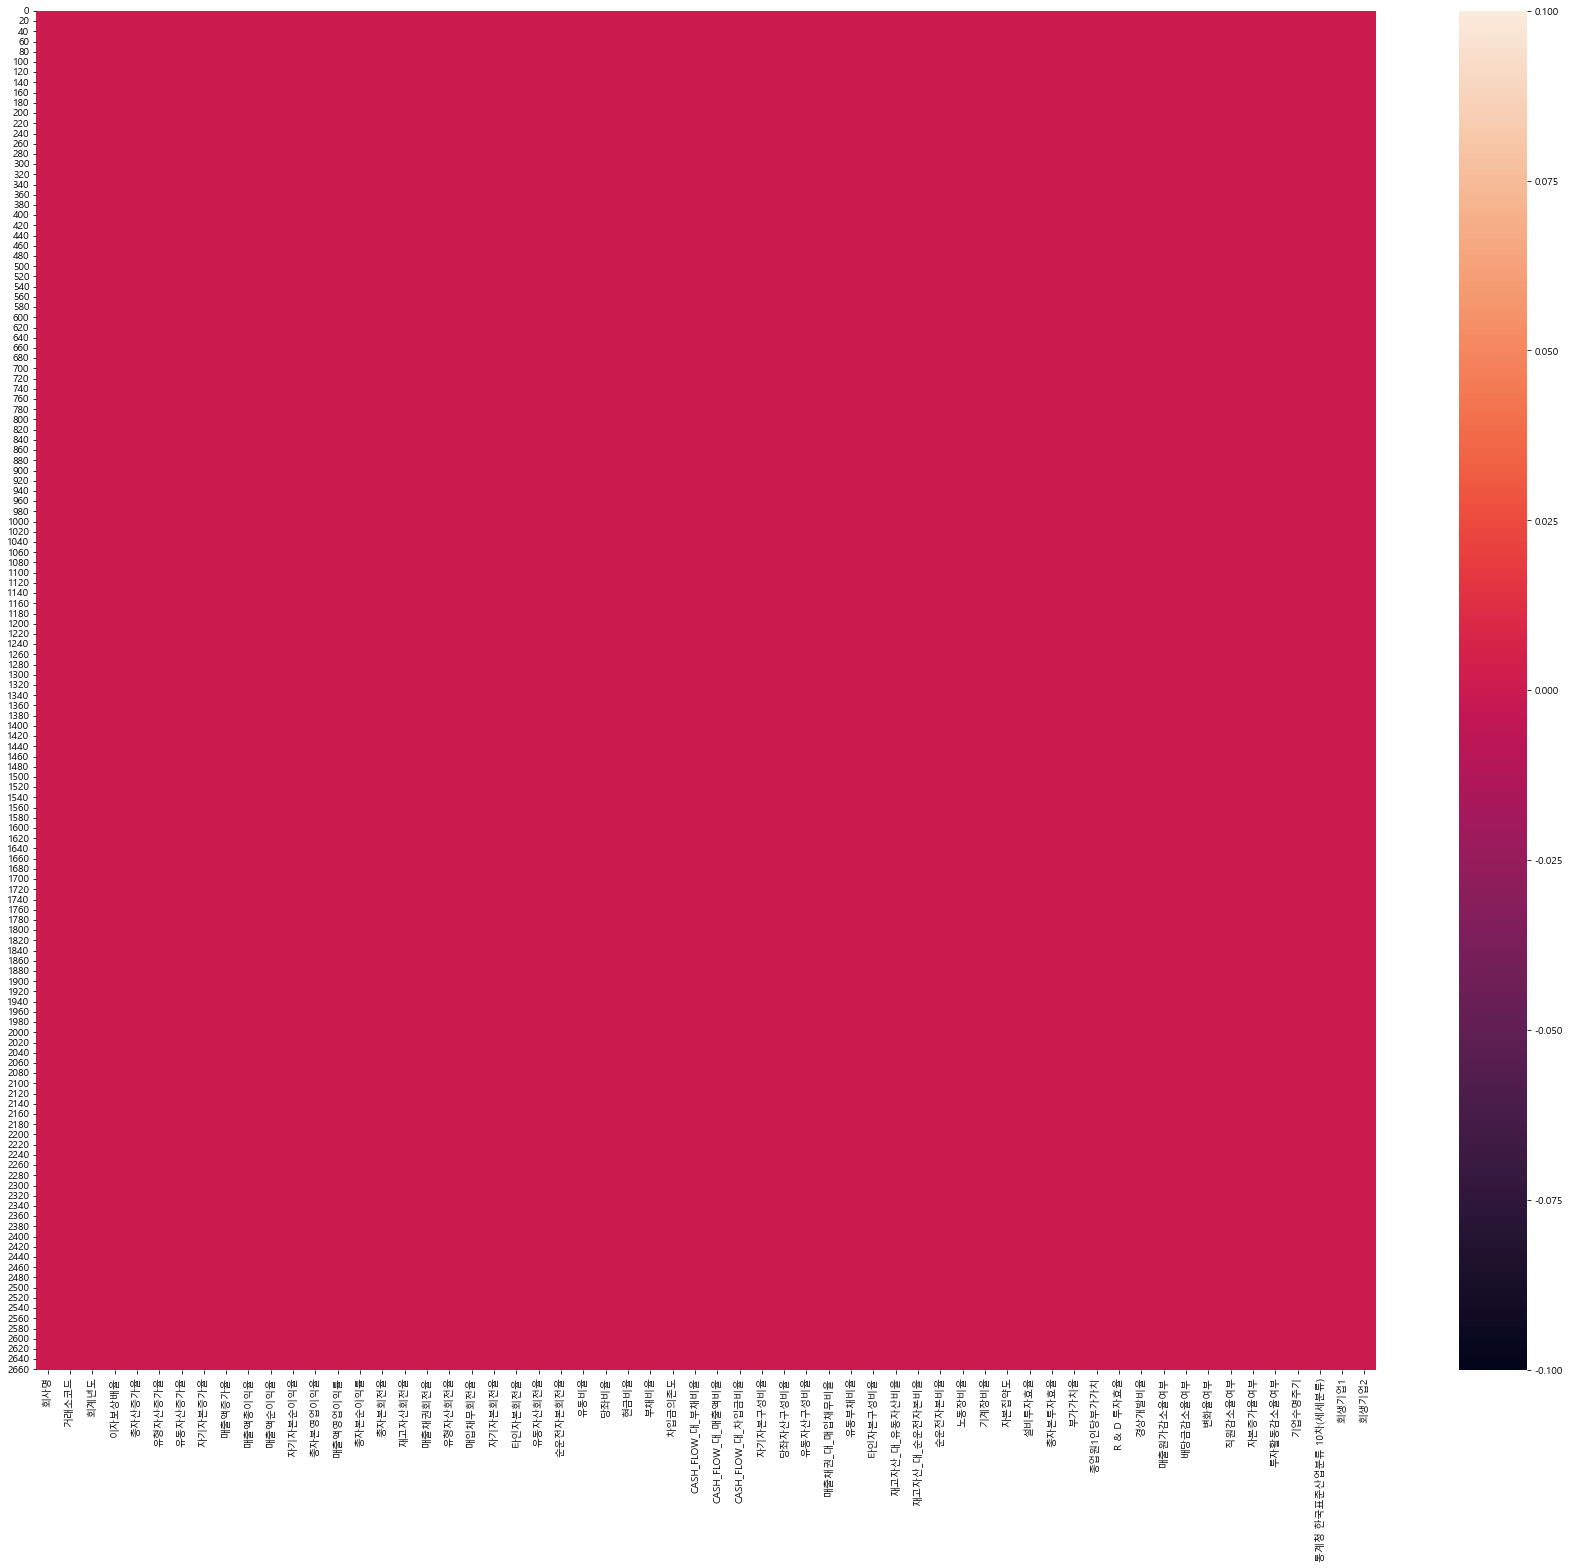

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글 깨짐 방지
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,25))

sns.heatmap(df.isna())

In [158]:
# # 남은 결측치를 평균으로 채워넣고 다시 확인

# medi = lambda x: x.fillna(x.mean())
# df = df.groupby('회사명').apply(medi)
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.isna().sum()

#### 이상치 확인

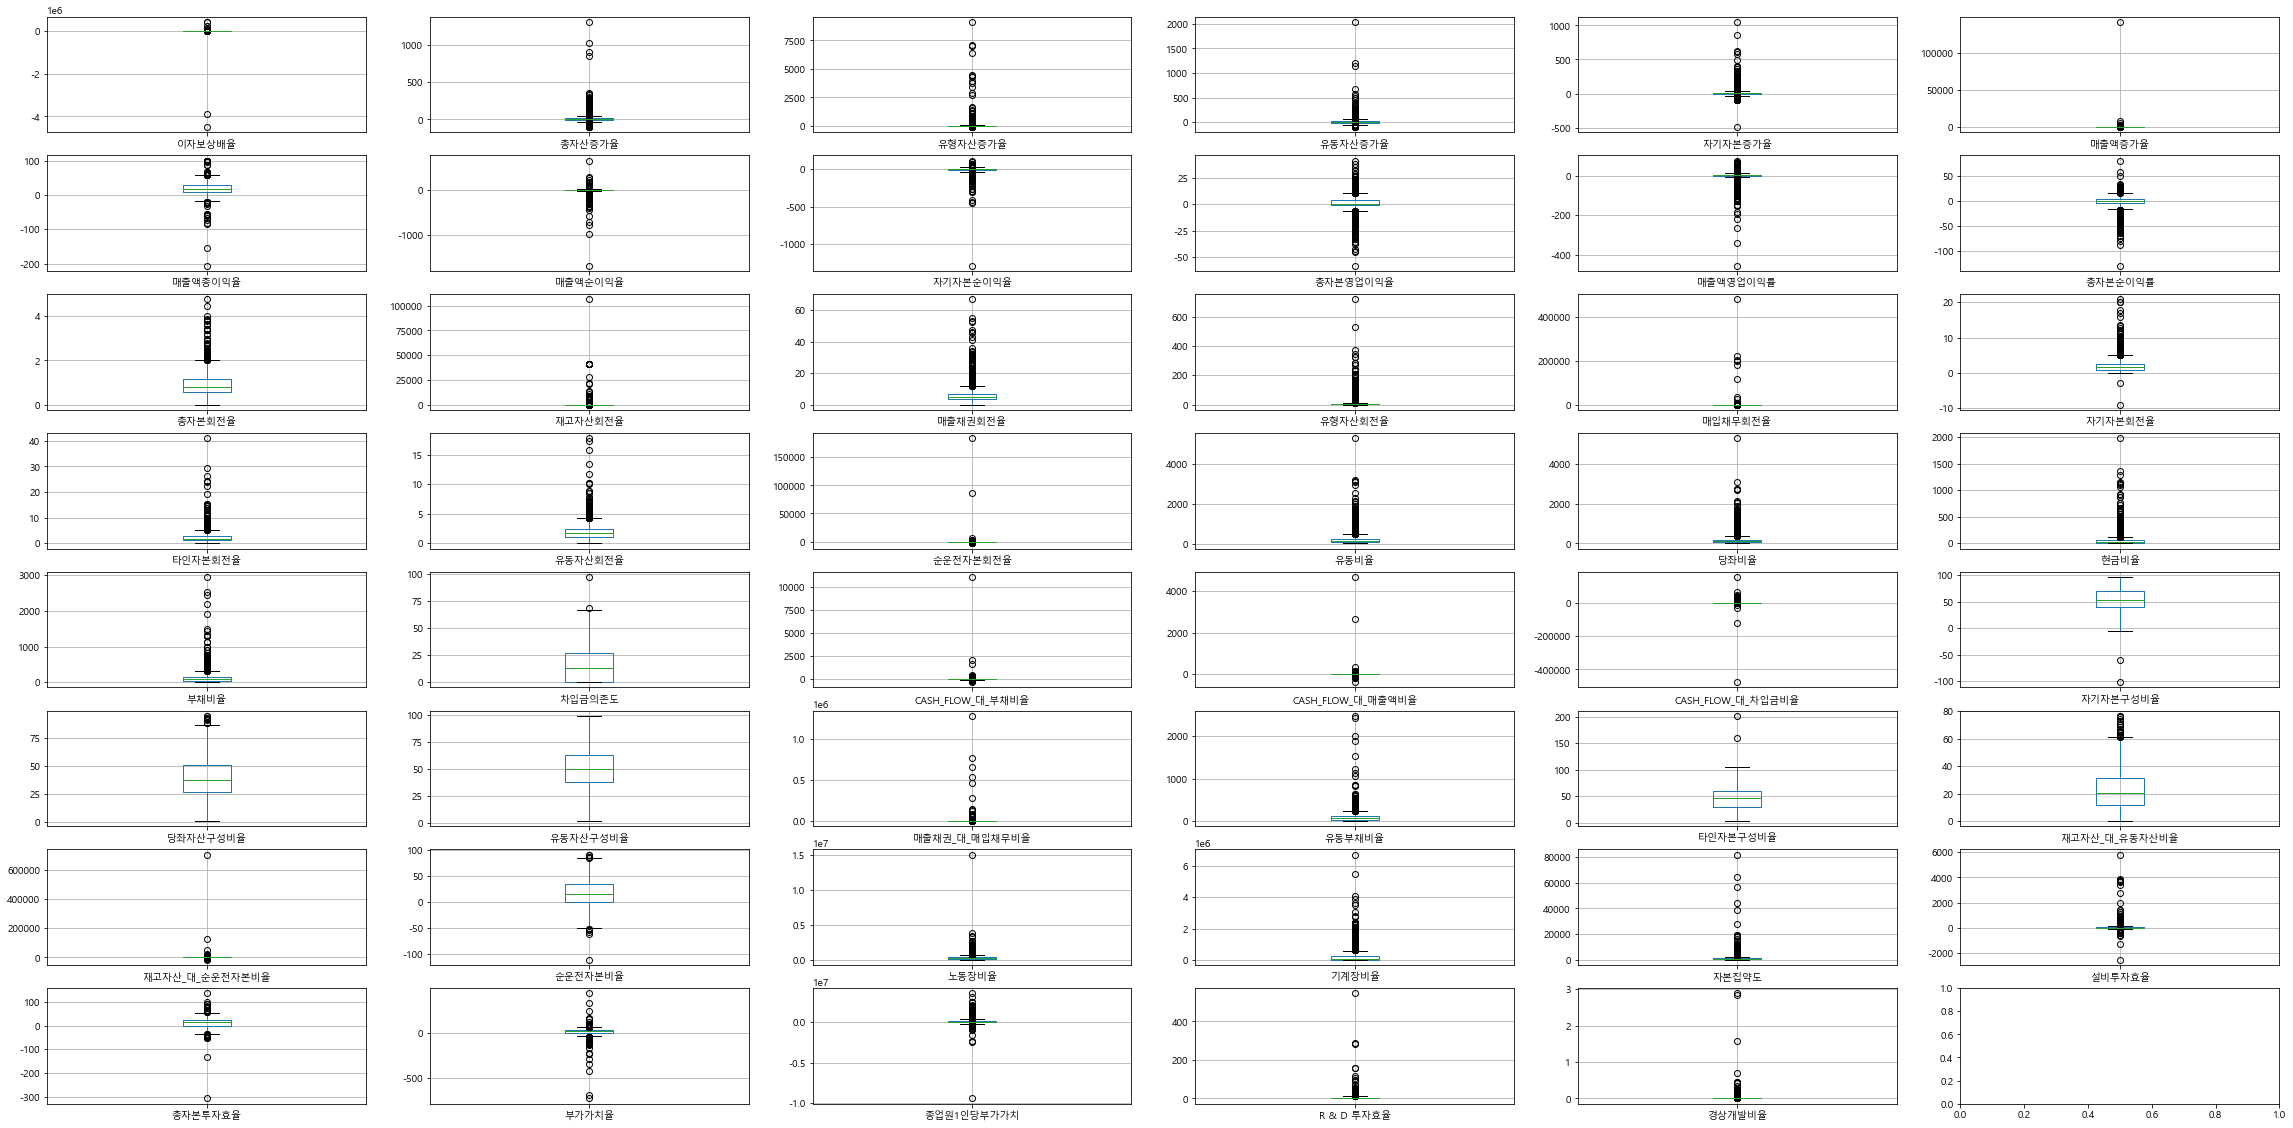

In [159]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df.boxplot(column='이자보상배율', ax=axes[0,0])
df.boxplot(column='총자산증가율', ax=axes[0,1])
df.boxplot(column='유형자산증가율', ax=axes[0,2])
df.boxplot(column='유동자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='매출액증가율', ax=axes[0,5])
df.boxplot(column='매출액총이익율', ax=axes[1,0])
df.boxplot(column='매출액순이익율', ax=axes[1,1])
df.boxplot(column='자기자본순이익율', ax=axes[1,2])
df.boxplot(column='총자본영업이익율', ax=axes[1,3])
df.boxplot(column='매출액영업이익률', ax=axes[1,4])
df.boxplot(column='총자본순이익률', ax=axes[1,5])
df.boxplot(column='총자본회전율', ax=axes[2,0])
df.boxplot(column='재고자산회전율', ax=axes[2,1])
df.boxplot(column='매출채권회전율', ax=axes[2,2])
df.boxplot(column='유형자산회전율', ax=axes[2,3])
df.boxplot(column='매입채무회전율', ax=axes[2,4])
df.boxplot(column='자기자본회전율', ax=axes[2,5])
df.boxplot(column='타인자본회전율', ax=axes[3,0])
df.boxplot(column='유동자산회전율', ax=axes[3,1])
df.boxplot(column='순운전자본회전율', ax=axes[3,2])
df.boxplot(column='유동비율', ax=axes[3,3])
df.boxplot(column='당좌비율', ax=axes[3,4])
df.boxplot(column='현금비율', ax=axes[3,5])
df.boxplot(column='부채비율', ax=axes[4,0])
df.boxplot(column='차입금의존도', ax=axes[4,1])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df.boxplot(column='자기자본구성비율', ax=axes[4,5])
df.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df.boxplot(column='유동자산구성비율', ax=axes[5,1])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df.boxplot(column='유동부채비율', ax=axes[5,3])
df.boxplot(column='타인자본구성비율', ax=axes[5,4])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df.boxplot(column='순운전자본비율', ax=axes[6,1])
df.boxplot(column='노동장비율', ax=axes[6,2])
df.boxplot(column='기계장비율', ax=axes[6,3])
df.boxplot(column='자본집약도', ax=axes[6,4])
df.boxplot(column='설비투자효율', ax=axes[6,5])
df.boxplot(column='총자본투자효율', ax=axes[7,0])
df.boxplot(column='부가가치율', ax=axes[7,1])
df.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df.boxplot(column='R & D 투자효율', ax=axes[7,3])
df.boxplot(column='경상개발비율', ax=axes[7,4])

plt.show()

In [160]:
# 윈저라이징을 통한 이상치 조정

from scipy.stats.mstats import winsorize
df1 = df.iloc[:, 3:50]
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.025)

# 통계청 ~ 반정형 : df.iloc[:, 50:]

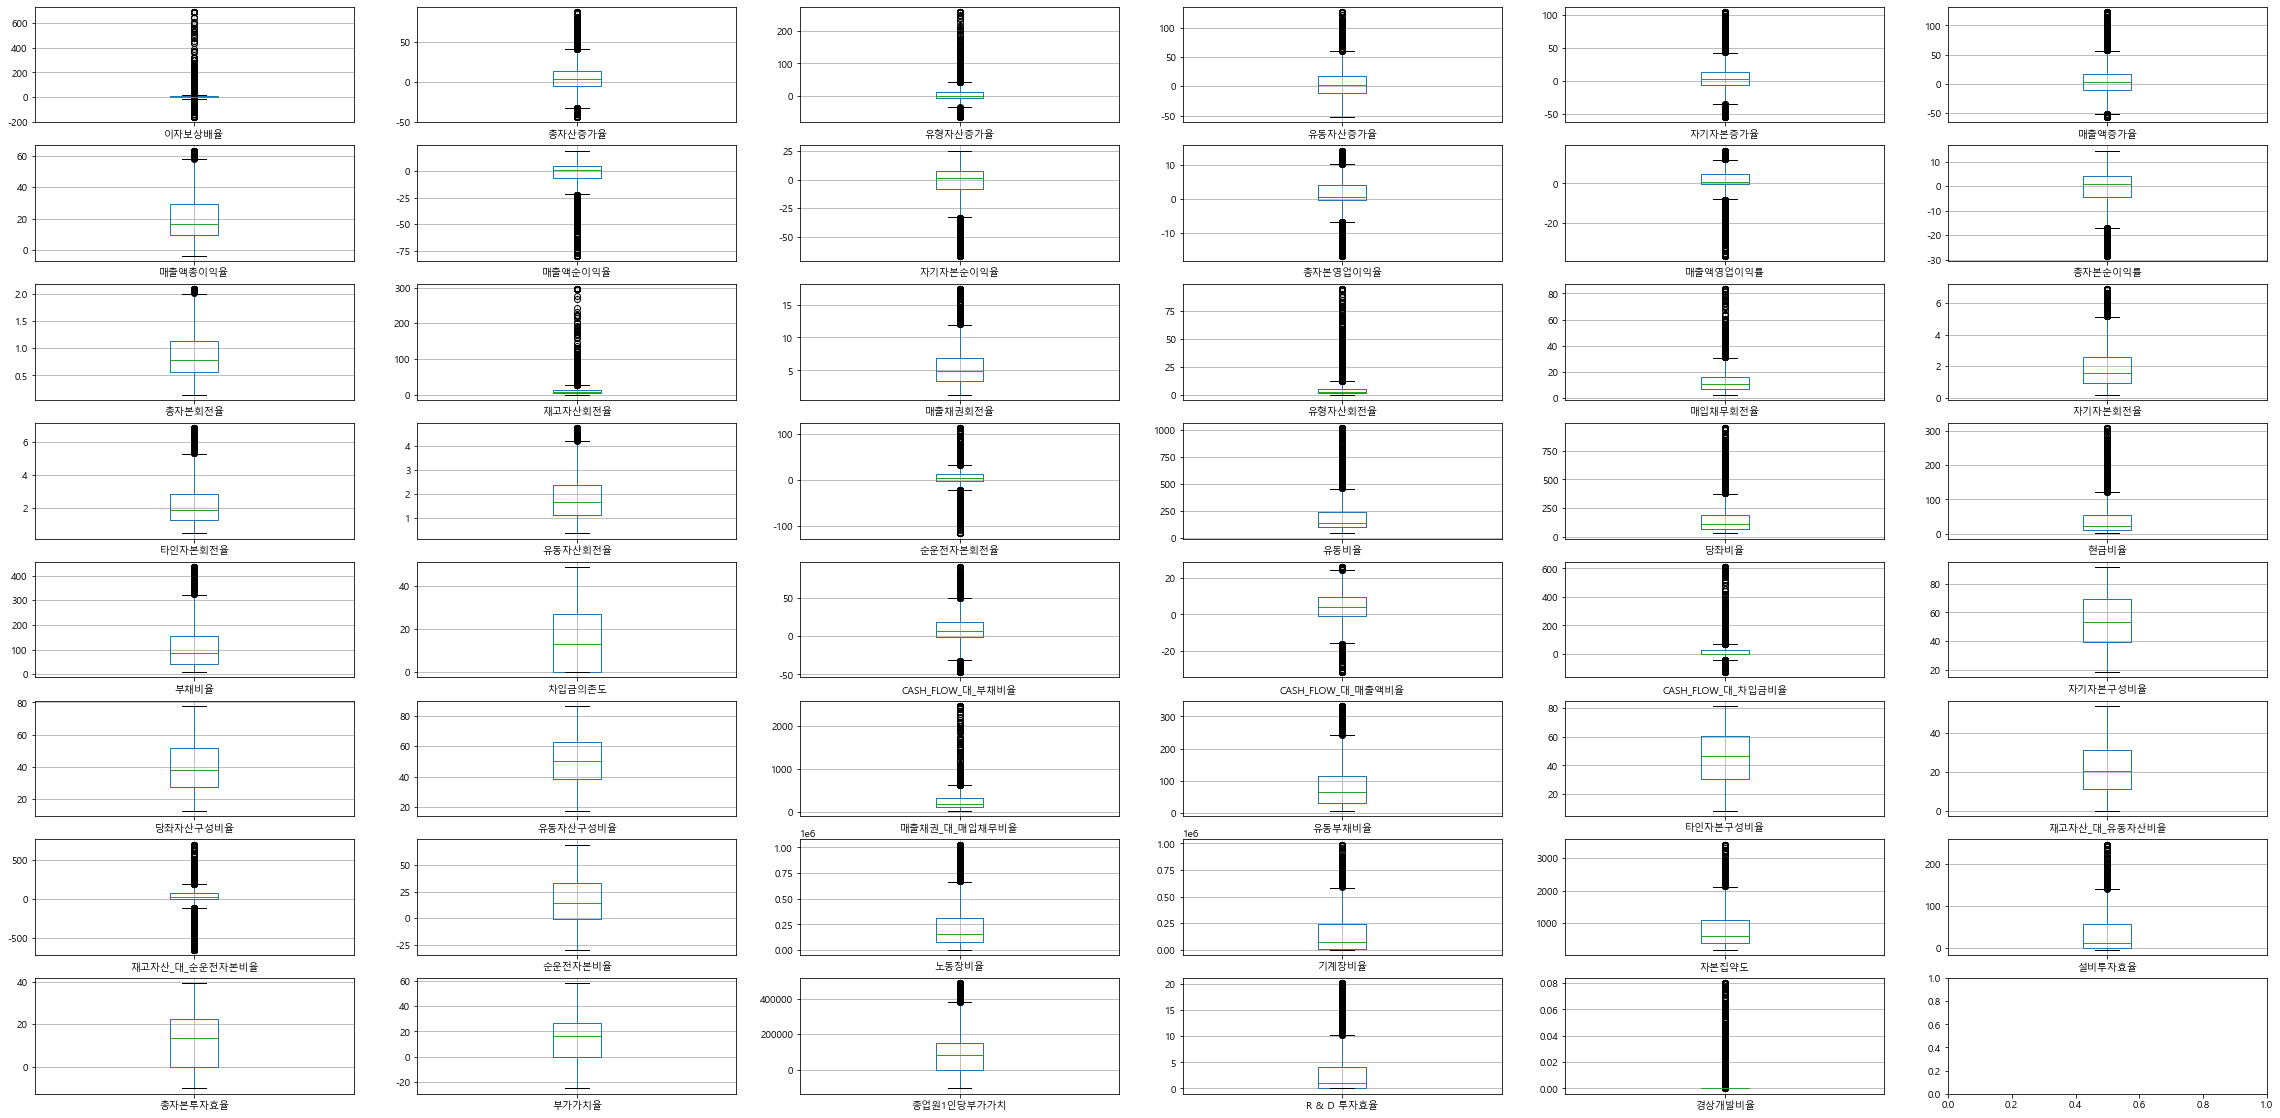

In [161]:
# 재확인
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df1.boxplot(column='이자보상배율', ax=axes[0,0])
df1.boxplot(column='총자산증가율', ax=axes[0,1])
df1.boxplot(column='유형자산증가율', ax=axes[0,2])
df1.boxplot(column='유동자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액증가율', ax=axes[0,5])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
df1.boxplot(column='총자본순이익률', ax=axes[1,5])
df1.boxplot(column='총자본회전율', ax=axes[2,0])
df1.boxplot(column='재고자산회전율', ax=axes[2,1])
df1.boxplot(column='매출채권회전율', ax=axes[2,2])
df1.boxplot(column='유형자산회전율', ax=axes[2,3])
df1.boxplot(column='매입채무회전율', ax=axes[2,4])
df1.boxplot(column='자기자본회전율', ax=axes[2,5])
df1.boxplot(column='타인자본회전율', ax=axes[3,0])
df1.boxplot(column='유동자산회전율', ax=axes[3,1])
df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
df1.boxplot(column='유동비율', ax=axes[3,3])
df1.boxplot(column='당좌비율', ax=axes[3,4])
df1.boxplot(column='현금비율', ax=axes[3,5])
df1.boxplot(column='부채비율', ax=axes[4,0])
df1.boxplot(column='차입금의존도', ax=axes[4,1])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df1.boxplot(column='유동부채비율', ax=axes[5,3])
df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df1.boxplot(column='순운전자본비율', ax=axes[6,1])
df1.boxplot(column='노동장비율', ax=axes[6,2])
df1.boxplot(column='기계장비율', ax=axes[6,3])
df1.boxplot(column='자본집약도', ax=axes[6,4])
df1.boxplot(column='설비투자효율', ax=axes[6,5])
df1.boxplot(column='총자본투자효율', ax=axes[7,0])
df1.boxplot(column='부가가치율', ax=axes[7,1])
df1.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df1.boxplot(column='R & D 투자효율', ax=axes[7,3])
df1.boxplot(column='경상개발비율', ax=axes[7,4])

plt.show()

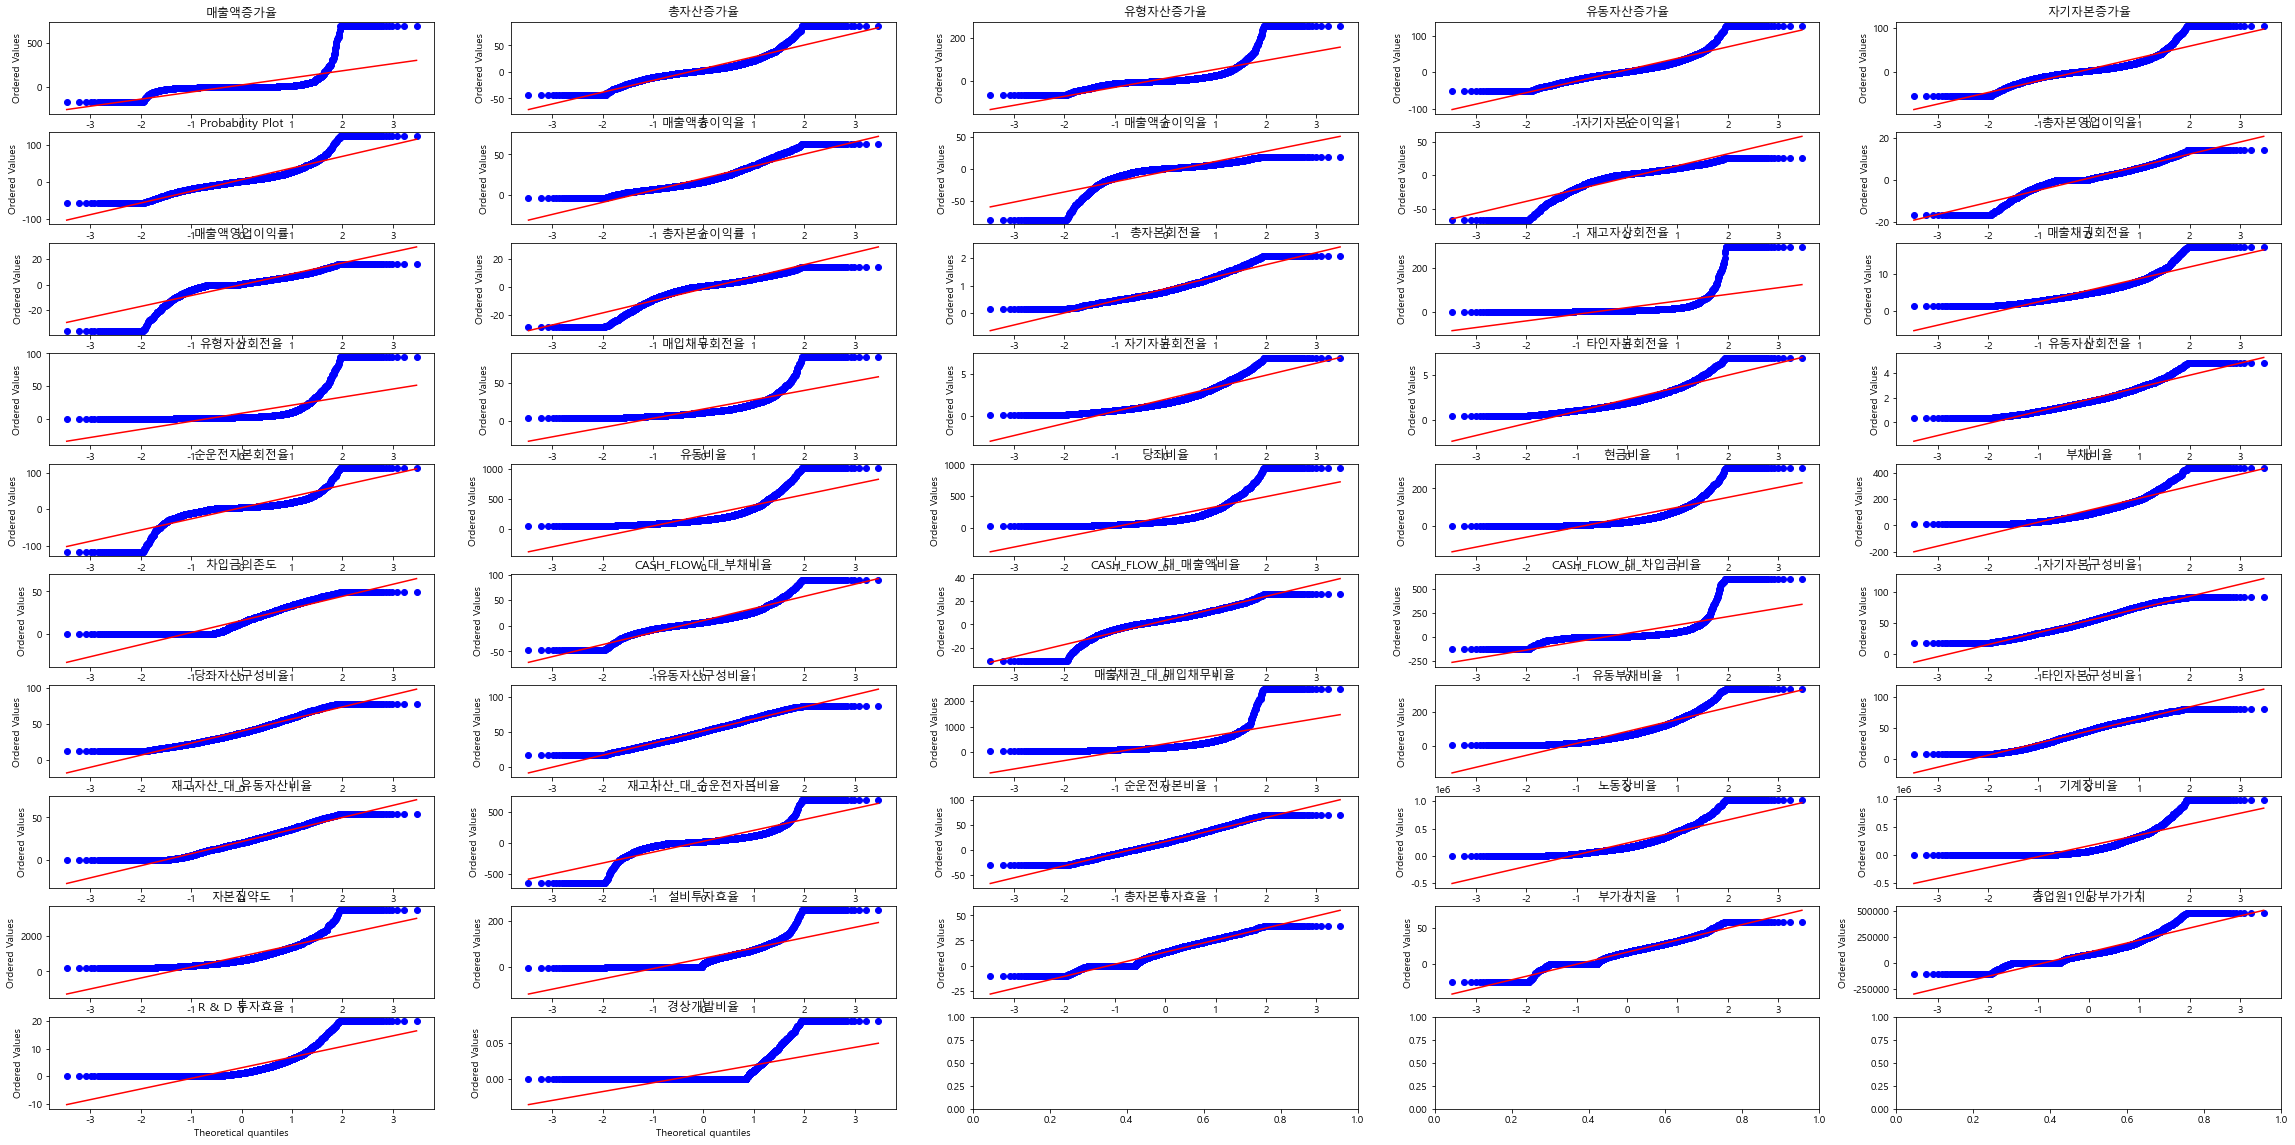

In [162]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(10,5)
fig.set_size_inches((40,20))

stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(df1['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")
stats.probplot(df1['R & D 투자효율'],dist=stats.norm,plot=axes[9,0])
axes[9,0].title.set_text("R & D 투자효율")
stats.probplot(df1['경상개발비율'],dist=stats.norm,plot=axes[9,1])
axes[9,1].title.set_text("경상개발비율")

plt.show()

In [163]:
# feature 후보 입장

temp = df1[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R & D 투자효율', '경상개발비율']]

x = pd.concat([df['회계년도'], temp], axis=1)
x = pd.concat([x, df.iloc[:, 50:]], axis=1)
x

,회계년도,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R & D 투자효율,경상개발비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청 한국표준산업분류 10차(세세분류),회생기업1,회생기업2
0,2011,-3.97,-9.01,3.09,-14.14,-11.92,4.86,-13.34,-22.34,-5.42,-8.79,-8.23,0.62,3.56,3.46,1.07,8.31,1.67,0.98,1.50,-10.06,77.25,44.95,9.65,187.71,45.91,0.31,0.32,0.43,34.76,24.74,42.52,251.16,158.37,65.24,41.81,-141.95,-12.52,327117.43,129560.18,619.70,27.172023,14.34,22.76,88884.42,2.67,0.0,0,0,0,0,0,0,1,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",0,0.0
1,2012,-14.54,-10.89,-23.08,-7.13,-13.10,3.97,-20.08,-32.80,-5.15,-8.73,-11.86,0.59,3.51,3.33,1.03,9.23,1.63,0.92,1.46,-12.32,78.63,49.31,10.10,164.76,35.76,0.34,0.33,0.60,37.77,24.00,38.27,286.89,128.87,62.23,37.28,-137.17,-10.40,331720.40,127439.93,570.15,15.750528,9.16,14.30,52247.72,2.70,0.0,0,0,0,0,0,0,4,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",0,0.0
2,2013,-8.11,-16.56,4.56,0.81,-0.94,12.26,-10.79,-18.06,-1.90,-2.88,-7.14,0.66,4.16,3.38,1.18,10.13,1.67,1.09,1.62,112.23,100.49,69.11,8.73,141.33,37.64,5.04,4.28,7.85,41.44,29.95,43.55,297.40,104.58,58.56,31.23,695.74,0.21,295230.56,102206.88,555.67,36.087416,19.17,27.76,106541.08,2.52,0.0,0,0,0,0,0,0,3,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",0,0.0
3,2014,-7.86,-9.94,-6.28,-2.89,-15.34,15.56,1.47,2.11,0.86,1.41,0.90,0.61,3.46,2.65,1.16,8.31,1.43,1.06,1.39,-18.21,86.41,54.76,4.50,128.99,35.46,0.98,0.87,1.55,43.67,28.07,44.30,278.59,117.39,56.33,36.62,-232.85,-6.97,270973.77,78679.85,521.24,44.140642,22.95,36.17,119609.56,1.99,0.0,0,0,0,0,0,0,5,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",0,0.0
4,2015,-1.78,-7.11,3.79,-0.25,-4.93,16.41,0.25,0.35,1.41,2.32,0.15,0.61,3.10,2.31,1.20,9.20,1.38,1.09,1.34,13.28,124.64,80.47,5.07,125.49,28.32,0.56,0.51,1.10,44.35,30.22,46.81,462.41,84.68,55.65,35.43,179.26,9.25,261076.22,58966.18,543.00,43.807204,21.06,34.29,114370.19,2.01,0.0,0,0,0,0,0,0,2,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2015,-7.63,16.37,-23.50,10.62,35.10,12.33,3.45,10.05,8.65,5.40,5.53,1.60,11.70,10.10,5.50,6.82,2.91,3.56,3.66,40.16,126.63,81.00,39.29,66.19,9.53,19.85,4.74,82.97,60.17,25.25,39.47,48.40,51.80,39.83,36.03,171.33,8.30,575587.81,618636.00,1772.84,79.347762,25.76,15.45,456716.05,0.22,0.0,0,0,0,0,0,1,3,전자집적회로 제조업,0,1.0
2657,2016,-13.50,-0.57,-30.60,-4.97,-30.62,9.51,-0.79,-1.55,0.70,0.57,-0.97,1.24,8.89,10.06,3.56,6.32,1.97,3.35,3.46,55.93,117.78,77.72,28.41,51.26,9.52,8.90,2.26,31.69,66.11,20.90,31.67,69.24,40.67,33.89,34.02,225.29,4.78,587079.33,603496.07,1570.00,45.327045,16.95,12.68,266105.71,0.41,0.0,0,0,0,0,0,0,3,전자집적회로 제조업,0,1.0
2658,2017,-10.68,-6.26,-27.37,-9.07,-13.03,8.57,-2.84,-5.23,-4.29,-3.49,-3.48,1.23,15.47,9.77,3.20,7.52,1.84,3.69,4.25,-116.97,96.12,83.68,32.60,48.59,6.35,16.73,4.20,86.22,67.30,22.42,25.75,79.24,39.81,32.70,12.94,-320.54,-1.04,503410.37,506486.83,1280.44,36.454095,14.33,11.01,183513.70,0.61,0.0,0,0,0,0,0,0,3,전자집적회로 제조업,0,0.0
2659,2018,11.66,-6.55,36.55,2.46,22.54,12.69,1.00,2.34,4.71,3.13,1.50,1.51,20.86,11.32,4.19,7.55,2.34,4.23,4.74,112.23,106.44,76.10,27.79,61.95,5.60,24.22,6.48,165.53,61.75,22.51,31.49,53.88,47.91,38.25,28.50,470.99,1.91,450943.02,498107.71,1370.23,0.000000,20.39,14.27,279433.75,1.01,0.0,0,0,0,0,0,1,3,전자집적회로 제조업,0,0.0


In [164]:
x.sort_values(by='회계년도', inplace=True)
x.reset_index(drop=True, inplace=True)
x

,회계년도,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,총자본순이익률,총자본회전율,재고자산회전율,매출채권회전율,유형자산회전율,매입채무회전율,자기자본회전율,타인자본회전율,유동자산회전율,순운전자본회전율,유동비율,당좌비율,현금비율,부채비율,차입금의존도,CASH_FLOW_대_부채비율,CASH_FLOW_대_매출액비율,CASH_FLOW_대_차입금비율,자기자본구성비율,당좌자산구성비율,유동자산구성비율,매출채권_대_매입채무비율,유동부채비율,타인자본구성비율,재고자산_대_유동자산비율,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R & D 투자효율,경상개발비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청 한국표준산업분류 10차(세세분류),회생기업1,회생기업2
0,2011,-3.97,-9.01,3.09,-14.14,-11.92,4.86,-13.34,-22.34,-5.42,-8.79,-8.23,0.62,3.56,3.46,1.07,8.31,1.67,0.98,1.50,-10.06,77.25,44.95,9.65,187.71,45.91,0.31,0.32,0.43,34.76,24.74,42.52,251.16,158.37,65.24,41.81,-141.95,-12.52,327117.43,129560.18,619.70,27.172023,14.34,22.76,88884.42,2.67,0.000000,0,0,0,0,0,0,1,"다이오드, 트랜지스터 및 유사 반도체소자 제조업",0,0.0
1,2011,62.81,22.55,127.19,-2.65,75.57,17.86,0.46,1.65,7.17,9.52,0.34,0.75,16.30,3.49,1.37,13.92,3.63,0.95,1.73,-28.57,92.11,86.40,1.98,434.65,48.89,7.34,10.09,11.37,18.33,46.57,49.64,423.70,326.42,81.67,6.19,-72.31,-4.25,658717.20,729676.85,1653.08,43.472590,17.32,28.51,286361.43,0.00,0.000000,0,0,0,0,0,1,2,자동차 차체용 신품 부품 제조업,0,0.0
2,2011,-15.58,-12.46,-5.49,-8.04,-17.96,50.61,-16.56,-27.45,-8.70,-11.42,-12.61,0.76,2.53,2.64,8.38,22.86,1.66,1.41,1.19,6.54,159.88,127.29,37.01,107.99,26.57,7.82,4.88,15.29,48.08,54.08,67.92,730.01,88.36,51.92,20.38,54.43,25.44,22417.73,21397.82,242.43,157.010347,14.52,17.46,35198.16,8.62,0.047455,0,0,0,0,0,0,4,완제 의약품 제조업,0,0.0
3,2011,14.80,17.39,14.09,9.12,0.66,13.91,9.60,6.93,0.00,0.00,3.79,0.39,12.79,3.82,1.64,4.66,0.72,0.87,0.71,4.94,136.93,130.32,4.80,87.25,0.00,12.07,15.23,0.00,53.40,52.81,55.49,107.94,75.88,46.60,4.82,17.89,14.96,141637.26,168358.36,665.58,0.000000,0.00,0.00,0.00,0.00,0.000000,0,0,0,0,0,0,2,자동차 차체용 신품 부품 제조업,0,0.0
4,2011,7.37,-5.43,12.89,10.29,37.72,13.80,18.41,11.18,3.13,7.00,8.22,0.45,10.29,8.84,10.21,11.58,0.61,1.69,1.13,2.41,875.69,801.90,308.18,34.26,10.38,13.93,8.24,34.27,74.48,37.00,40.41,175.35,6.56,25.52,8.43,9.51,35.79,45498.38,6320.16,1107.60,0.000000,14.46,33.54,160199.88,0.00,0.000000,0,0,0,0,0,0,4,속도계 및 적산계기 제조업,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2019,-18.52,-2.13,-13.26,-20.07,-24.37,42.58,-52.64,-39.97,-11.26,-26.49,-22.37,0.42,16.20,2.46,15.68,13.43,0.76,0.97,0.89,15.86,113.69,111.50,18.15,80.54,1.58,-4.38,-4.13,-124.00,55.39,48.59,49.55,313.16,78.68,44.61,1.93,16.01,5.97,8981.89,3785.64,309.95,246.554204,10.48,22.14,32483.78,6.32,0.000000,0,0,0,0,0,0,4,시스템 소프트웨어 개발 및 공급업,0,0.0
2657,2019,3.18,34.15,-4.14,0.37,2.43,32.13,1.71,1.26,1.97,2.95,1.14,0.67,2.85,4.55,7.50,10.65,0.74,6.85,0.89,2.09,810.39,641.55,129.10,12.05,0.00,22.46,3.69,0.00,89.25,56.77,71.71,221.01,9.91,10.75,20.83,23.77,62.86,45685.56,5686.88,456.48,215.314603,21.55,32.88,98367.67,6.12,0.000000,0,0,0,0,0,1,3,기타 무선 통신장비 제조업,0,1.0
2658,2019,6.76,73.39,14.54,-3.23,21.67,26.47,-3.41,-3.74,0.79,0.96,-2.80,0.82,12.41,11.92,15.18,10.51,1.10,3.27,1.93,7.08,204.02,182.06,35.35,40.17,0.96,19.41,7.00,581.02,71.34,39.29,44.03,77.07,30.25,28.66,10.77,21.12,22.45,128487.65,6682.84,1934.20,0.000000,15.25,19.19,294968.64,0.00,0.000000,0,0,0,0,0,0,3,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",0,1.0
2659,2019,-14.86,-5.41,-40.64,-16.52,-34.08,3.64,-12.73,-19.34,-9.28,-14.86,-7.95,0.62,3.01,5.97,1.16,4.50,1.52,1.06,1.67,-5.58,55.39,32.03,6.03,145.88,44.40,-3.01,-2.63,-4.03,40.67,12.29,30.20,60.74,134.04,59.33,54.06,-80.57,-24.32,683510.07,644797.56,1209.37,13.884351,7.85,11.56,94900.93,0.94,0.000000,0,0,0,0,0,0,1,전자부품 제조업,0,0.0


In [165]:
x['회계년도'].value_counts()

2017    325
2018    325
2019    325
2016    314
2015    304
2014    286
2013    272
2012    259
2011    251
Name: 회계년도, dtype: int64

#### 연간 데이터 분포
2011 - x[:229]  
2012 - x[229:467]  
2013 - x[467:718]  
2014 - x[718:982]  
2015 - x[982:1263]  
2016 - x[1263:1554]  
2017 - x[1554:1853]  
2018 - x[1853:2152]  
2019 - x[2152:]  
  
2011~2016 : x[:1554]  
2017~2019 : x[1554:]

<AxesSubplot:>

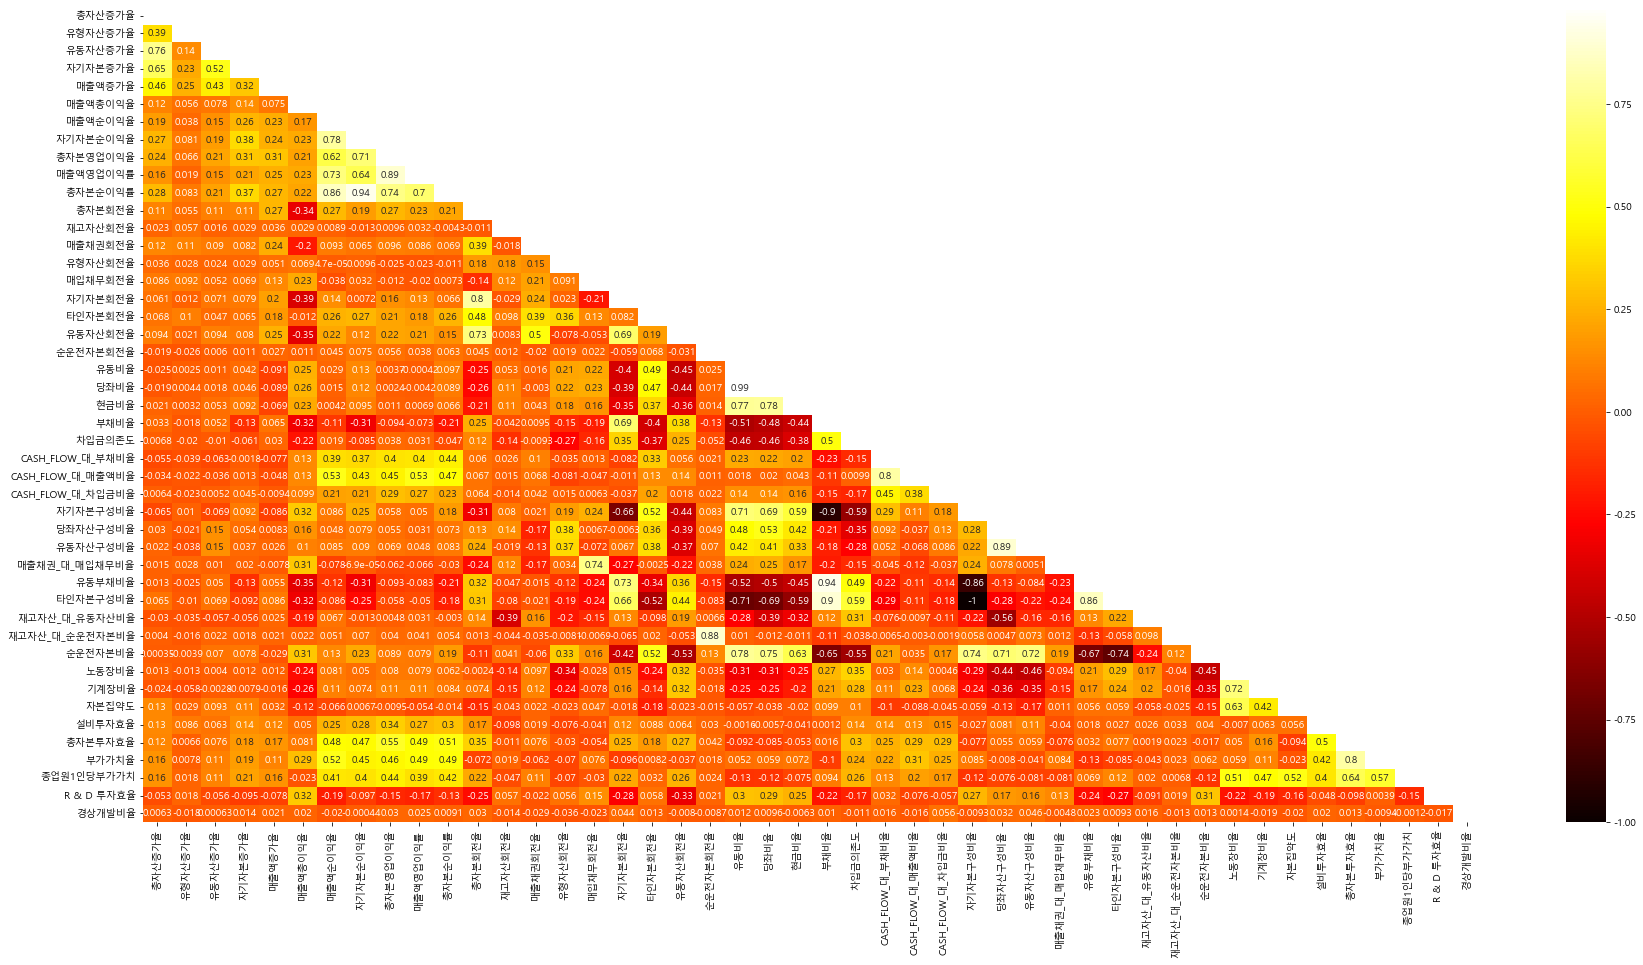

In [166]:
df_corr = x.iloc[:, :47].corr(method='pearson')
mask=np.zeros_like(x.iloc[:, :47].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 한글 깨짐 방지
plt.rc("axes", unicode_minus=False) # 마이너스 부호 깨짐 방지
plt.figure(figsize=(30,15))

sns.heatmap(x.iloc[:, :47].corr(), annot=True, cmap='hot', mask=mask)

In [167]:
# 타겟 정하기
target_one = x['회생기업1']
target_two = x['회생기업2']

# 비율 데이터
df_rate = x.iloc[:,:47]

# 반정형 데이터
df_encoding = x.iloc[:, 47:53]

# # 둘 다 필요할 땐
# df_all = pd.concat([df_rate, df_encoding], axis=1)

In [168]:
df_rate.drop(columns=['매출액영업이익률','총자본순이익률','당좌비율','현금비율','자기자본구성비율',
                      '유동자산구성비율','유동부채비율','자기자본구성비율','재고자산_대_순운전자본비율',
                      '자본집약도','부가가치율','CASH_FLOW_대_차입금비율','매입채무회전율',
                      'CASH_FLOW_대_매출액비율','총자본회전율', '타인자본구성비율', '당좌자산구성비율', '유동자산회전율', '타인자본회전율'], inplace=True)

<AxesSubplot:>

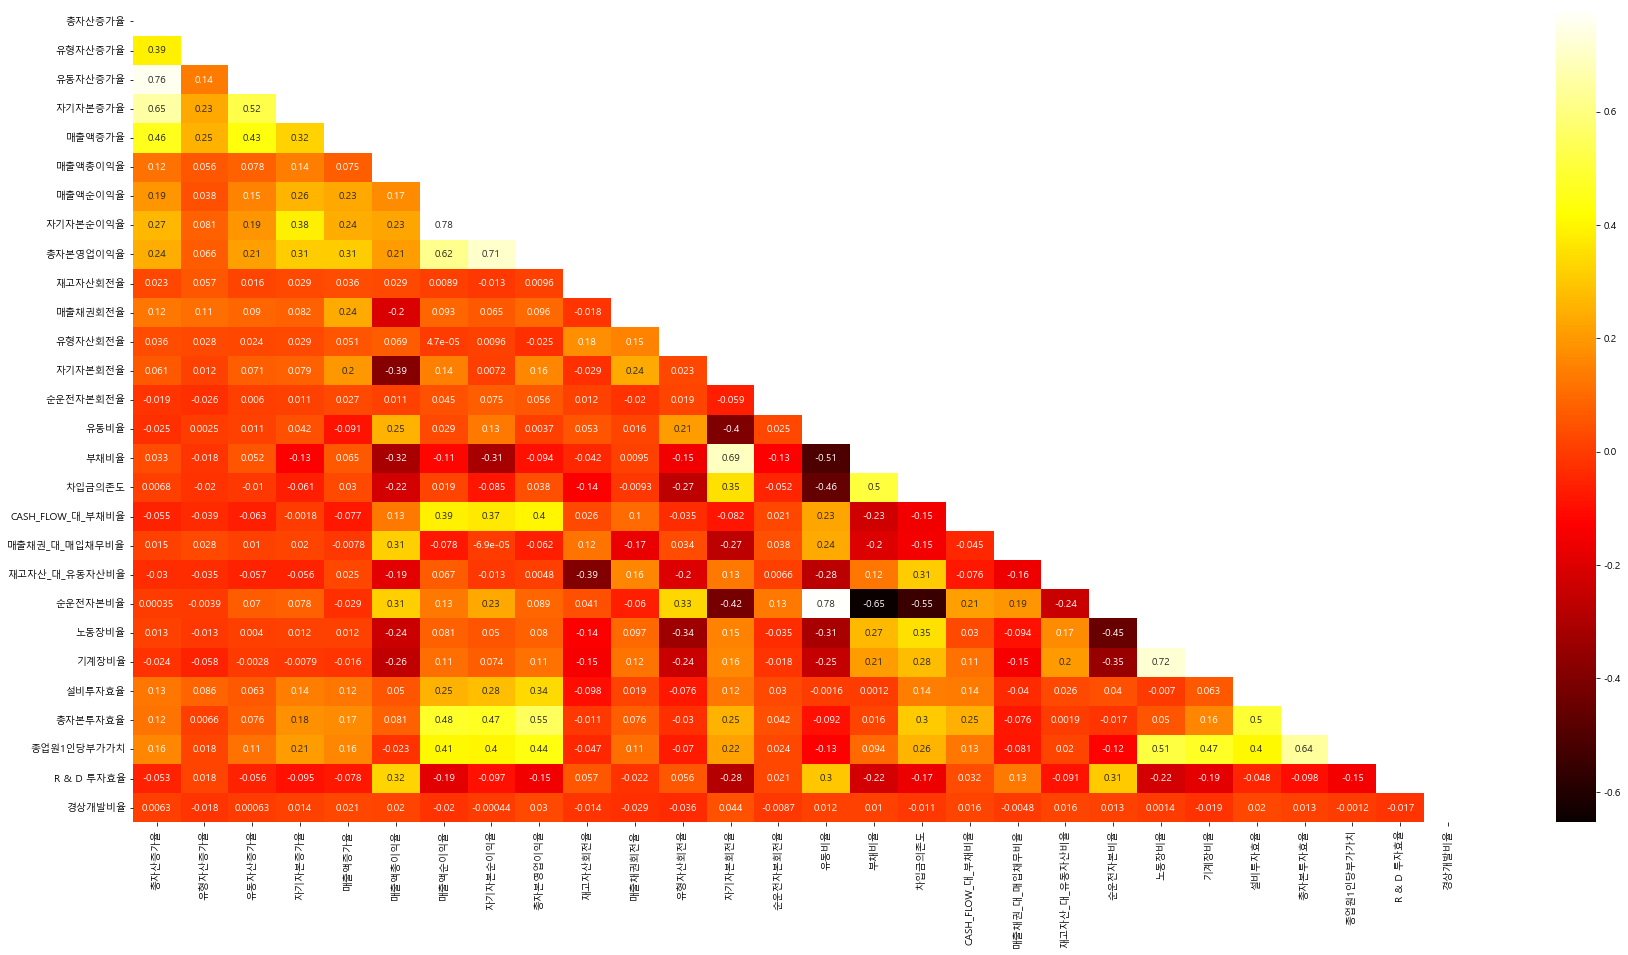

In [169]:
df_corr = df_rate.corr(method='pearson')
mask=np.zeros_like(df_rate.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 한글 깨짐 방지
plt.rc("axes", unicode_minus=False) # 마이너스 부호 깨짐 방지
plt.figure(figsize=(30,15))

sns.heatmap(df_rate.corr(), annot=True, cmap='hot', mask=mask)

In [170]:
df_rate.drop(columns=['회계년도'], inplace=True)

### 정규화

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

SS = StandardScaler()
RS = RobustScaler()
MIN = MinMaxScaler()

# ############ WARNING ###############
# TEST SET 까지 스케일링 먹이지 마시오 #
# ##################### ##############

# Standard Scaler
ss_sc = SS.fit_transform(df_rate[:1554])
ss_sc2 = pd.DataFrame(ss_sc)

# Robust Scaler
rs_sc = RS.fit_transform(df_rate[:1554])
rs_sc2 = pd.DataFrame(rs_sc)

# Min-Max Scaler
mi_sc = MIN.fit_transform(df_rate[:1554])
mi_sc2 = pd.DataFrame(mi_sc)

In [172]:
ss_sc2.columns = df_rate.columns
rs_sc2.columns = df_rate.columns
mi_sc2.columns = df_rate.columns

In [173]:
# 둘 다 필요할 때
ss_all = pd.concat([ss_sc2, df_rate[1554:]])
ss_all = pd.concat([ss_all, df_encoding], axis=1)

In [174]:
tf = x.iloc[:,1:47]
#tf = pd.concat([tf, df_encoding[:251]], axis=1)
tf.drop(columns=['매출액영업이익률','총자본순이익률','당좌비율','현금비율','자기자본구성비율',
                      '유동자산구성비율','유동부채비율','자기자본구성비율','재고자산_대_순운전자본비율',
                      '자본집약도','부가가치율','CASH_FLOW_대_차입금비율','매입채무회전율',
                      'CASH_FLOW_대_매출액비율','총자본회전율', '타인자본구성비율', '당좌자산구성비율', '유동자산회전율', '타인자본회전율'], inplace=True)

In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfx = tf[['자기자본증가율', '자기자본순이익율', '유동비율', '기계장비율', '경상개발비율']]

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(dfx, i) for i in range(dfx.shape[1])]
vif['features'] = dfx.columns

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,1.187029,자기자본증가율
1,1.185485,유동비율
2,1.142702,자기자본순이익율
3,1.122410,기계장비율
4,1.105458,경상개발비율


In [222]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = target_two
feature = tf[['자기자본순이익율', '자기자본증가율', 'CASH_FLOW_대_부채비율', '부채비율', '매출채권_대_매입채무비율', '종업원1인당부가가치',
        '기계장비율', '노동장비율', '유동비율']]

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
# feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
model = sm.OLS(target, feature)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

# with open ('summary_with_const.csv', 'w') as fh:
#     fh.write(fitted_model.summary().as_csv())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  회생기업2   R-squared (uncentered):                   0.222
Model:                            OLS   Adj. R-squared (uncentered):              0.219
Method:                 Least Squares   F-statistic:                              83.99
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   1.44e-137
Time:                        13:04:02   Log-Likelihood:                         -1047.6
No. Observations:                2661   AIC:                                      2113.
Df Residuals:                    2652   BIC:                                      2166.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
자기자본순이익율             0.0029      0.000      6.088      0.000       0.002       0.004
자기자본증가율              0.0010      0.000      3.843      0.000       0.001       0.002
CASH_FLOW_대_부채비율     0.0015      0.000      4.774      0.000       0.001       0.002
부채비율                 0.0004   6.92e-05      5.527      0.000       0.000       0.001
매출채권_대_매입채무비율     4.009e-05   1.56e-05      2.576      0.010    9.58e-06    7.06e-05
종업원1인당부가가치        2.993e-07   7.45e-08      4.018      0.000    1.53e-07    4.45e-07
기계장비율              9.45e-08   4.58e-08      2.061      0.039    4.59e-09    1.84e-07
노동장비율             5.019e-08   4.49e-08      1.117      0.264   -3.79e-08    1.38e-07
유동비율              9.825e-05   3.12e-05      3.149      0.002    3.71e-05       0.000
==============================================================================
Omnibus:                      603.884   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1086.999
Skew:                           1.503   Prob(JB):                    9.14e-237
Kurtosis:                       3.874   Cond. No.                     3.17e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
def backward_regression(feature, target, initial_list=[], threshold_out = 0.05):

    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")

    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 

    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())

        if not changed:
            break

    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(30,10))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(tf,target_two)

                            OLS Regression Results                            
Dep. Variable:                  회생기업2   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     31.21
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.42e-57
Time:                        10:45:59   Log-Likelihood:                -992.72
No. Observations:                2661   AIC:                             2007.
Df Residuals:                    2650   BIC:                             2072.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0925      0.024      3.832      0.0

In [178]:
## LASSO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
%matplotlib inline

lasso = Lasso(alpha = 100)
neg_mse_scores = cross_val_score(lasso, tf, target_two, scoring="neg_mean_squared_error", cv=TimeSeriesSplit(n_splits=6))
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.042 -0.126 -0.18  -0.187 -0.211 -0.21 ]
 5 folds 의 개별 RMSE scores :  [0.205 0.355 0.424 0.432 0.459 0.458]
 5 folds 의 평균 RMSE : 0.389 


In [179]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0,0.55,0.6,0.65,0.7,0.75]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=tf, y_target_n=target_two)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 0.366 
alpha 0.55일 때 5 폴드 세트의 평균 RMSE: 0.364 
alpha 0.6일 때 5 폴드 세트의 평균 RMSE: 0.364 
alpha 0.65일 때 5 폴드 세트의 평균 RMSE: 0.364 
alpha 0.7일 때 5 폴드 세트의 평균 RMSE: 0.364 
alpha 0.75일 때 5 폴드 세트의 평균 RMSE: 0.364 


,alpha:0,alpha:0.55,alpha:0.6,alpha:0.65,alpha:0.7,alpha:0.75
총자본영업이익율,1.161734e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
매출채권회전율,8.343809e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
자기자본순이익율,1.761591e-03,1.826329e-03,1.696590e-03,1.566853e-03,1.437113e-03,1.307374e-03
매출액총이익율,1.689357e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
순운전자본비율,9.076355e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
R & D 투자효율,8.491479e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
자기자본회전율,7.410985e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
자기자본증가율,6.827164e-04,2.798629e-04,2.331392e-04,1.864153e-04,1.396916e-04,9.296792e-05
CASH_FLOW_대_부채비율,5.299977e-04,4.386493e-04,3.709016e-04,3.031537e-04,2.354060e-04,1.676584e-04
재고자산_대_유동자산비율,1.919517e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [180]:
#df_choice = ss_all[['총자본영업이익율', '자기자본순이익율', '유동자산회전율', '타인자본회전율', '매출채권회전율', '재고자산_대_유동자산비율',
#'당좌자산구성비율', '차입금의존도', '순운전자본비율', '총자본투자효율']]

# df_choice = ss_all[['기계장비율', '총자본영업이익율', '유형자산회전율', '자기자본순이익율', '유동자산회전율', '순운전자본비율', '타인자본회전율',
# '재고자산_대_유동자산비율', '당좌자산구성비율', '유동자산증가율', '매출채권회전율', '유동비율', '매출원가감소율여부', '배당금감소율여부', '변화율여부',
#        '직원감소율여부', '자본증가율여부', '투자활동감소율여부']]

df_choice = ss_all[['기계장비율', '총자본영업이익율', '자기자본회전율', '종업원1인당부가가치', '노동장비율', '유동비율', 'R & D 투자효율', '경상개발비율',
'매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부']]

df_choice = pd.concat([df_choice, x['회계년도'].astype(int)], axis=1)
#df_choice = pd.concat([df_choice, df['거래소코드'].astype(int)], axis=1)

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

parameters = {
    'learning_rate' : [1, 0.1, 0.3, 0.5, 0.01],
    'max_depth' : [-1, 3, 5, 7, 10],
    'subsample' : [0.3, 0.5, 0.7, 1],
    'scale_pos_weight' : [1, 3, 5],
    'n_estimators' : [100, 150, 200, 300, 500, 1000]
}

model = xgb.XGBClassifier()
gs_model = GridSearchCV(model, parameters, scoring='f1', cv=TimeSeriesSplit(n_splits=6))

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}, f1:{}'.format(accuracy, precision, recall, f1))

In [183]:
X_train = df_choice[:1554]
y_train = target_two[:1554]
X_test = df_choice[1554:]
y_test = target_two[1554:]

# gs_model.fit(X_train, y_train)
# gs_model.best_params_

In [184]:
gs_model_two = xgb.XGBClassifier(max_depth=3, n_estimators=200, scale_pos_weight=5, learning_rate=0.5, subsample=0.3, random_state=100)
gs_model_two.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [185]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[293, 521],
       [ 54, 239]], dtype=int64)

In [186]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.84      0.36      0.50       814
         1.0       0.31      0.82      0.45       293

    accuracy                           0.48      1107
   macro avg       0.58      0.59      0.48      1107
weighted avg       0.70      0.48      0.49      1107



In [187]:
get_clf_eval(y_test, pred)

Confusion Matrix
[[293 521]
 [ 54 239]]
정확도:0.48057813911472447, 정밀도:0.3144736842105263, 재현율:0.8156996587030717, f1:0.45394112060778724


In [188]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5878252593269657

In [189]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5878252593269657

In [190]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
#smote = SMOTE(random_state=100, sampling_strategy={0:y_train.value_counts().iloc[-1]/2, 1:y_train.value_counts().iloc[-1]})
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("Before : ", X_train.shape, y_train.shape)
print("After : ", X_train_over.shape, y_train_over.shape)
y_train_over.value_counts()

Before :  (1554, 15) (1554,)
After :  (2814, 15) (2814,)


0.0    1407
1.0    1407
Name: 회생기업2, dtype: int64

In [191]:
gs_model_two.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [192]:
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[775,  39],
       [277,  16]], dtype=int64)

In [193]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83       814
         1.0       0.29      0.05      0.09       293

    accuracy                           0.71      1107
   macro avg       0.51      0.50      0.46      1107
weighted avg       0.62      0.71      0.64      1107



In [194]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5033479803104376

In [195]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=0.1)
model_lr.fit(X_train_over, y_train_over)
pred_lr = model_lr.predict(X_test)

cm = confusion_matrix(y_test, pred_lr)
cm

array([[806,   8],
       [288,   5]], dtype=int64)

In [196]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lr)

0.7326106594399278

In [197]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.84       814
         1.0       0.38      0.02      0.03       293

    accuracy                           0.73      1107
   macro avg       0.56      0.50      0.44      1107
weighted avg       0.64      0.73      0.63      1107



In [198]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_lr)

0.5036184182941862

In [199]:
model_lr_origin = LogisticRegression(random_state=100)
model_lr_origin.fit(X_train, y_train)
pred_lr_origin = model_lr_origin.predict(X_test)
accuracy_score(y_test, pred_lr_origin)

0.7037037037037037

In [200]:
print(classification_report(y_test, pred_lr_origin))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83       814
         1.0       0.03      0.00      0.01       293

    accuracy                           0.70      1107
   macro avg       0.38      0.48      0.42      1107
weighted avg       0.54      0.70      0.61      1107



In [201]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_lr_origin)

0.4795934625286161

In [202]:
from imblearn.under_sampling import NearMiss

NM_Model = NearMiss(version = 2)

u_train_X, u_train_Y = NM_Model.fit_resample(X_train, y_train)
u_train_Y.value_counts()

0.0    147
1.0    147
Name: 회생기업2, dtype: int64

In [203]:
gs_model_two.fit(u_train_X, u_train_Y)
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 75, 739],
       [ 12, 281]], dtype=int64)

In [204]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.09      0.17       814
         1.0       0.28      0.96      0.43       293

    accuracy                           0.32      1107
   macro avg       0.57      0.53      0.30      1107
weighted avg       0.71      0.32      0.24      1107



In [205]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5255909803691373

In [206]:
model_lr_u = LogisticRegression(random_state=100)
model_lr_u.fit(u_train_X, u_train_Y)
pred_lr_u = model_lr_u.predict(X_test)
accuracy_score(y_test, pred_lr_u)

0.7018970189701897

In [207]:
print(classification_report(y_test, pred_lr_u))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.82       814
         1.0       0.05      0.01      0.01       293

    accuracy                           0.70      1107
   macro avg       0.39      0.48      0.42      1107
weighted avg       0.55      0.70      0.61      1107



In [208]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_lr_u)

0.47945719532750253

In [209]:
NM_Model_2 = NearMiss(version = 2, sampling_strategy={1:u_train_Y.value_counts().iloc[-1], 0:u_train_Y.value_counts().iloc[-1]*3})
u_train_X, u_train_Y = NM_Model_2.fit_resample(X_train, y_train)
u_train_Y.value_counts()

0.0    441
1.0    147
Name: 회생기업2, dtype: int64

In [210]:
gs_model_two.fit(u_train_X, u_train_Y)
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[ 55, 759],
       [  2, 291]], dtype=int64)

In [211]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.96      0.07      0.13       814
         1.0       0.28      0.99      0.43       293

    accuracy                           0.31      1107
   macro avg       0.62      0.53      0.28      1107
weighted avg       0.78      0.31      0.21      1107



In [212]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.5303708145005073

In [213]:
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import ADASYN

X_samp, Y_samp = SMOTETomek(random_state=100).fit_resample(X_train, y_train)
Y_samp.value_counts()

0.0    1400
1.0    1400
Name: 회생기업2, dtype: int64

In [214]:
gs_model_two.fit(X_samp, Y_samp)
pred = gs_model_two.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[782,  32],
       [289,   4]], dtype=int64)

In [215]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83       814
         1.0       0.11      0.01      0.02       293

    accuracy                           0.71      1107
   macro avg       0.42      0.49      0.43      1107
weighted avg       0.57      0.71      0.62      1107



In [216]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred)

0.48716991891053324

In [217]:
model_lr_x = LogisticRegression(random_state=100)
model_lr_x.fit(X_samp, Y_samp)
pred_lr_x = model_lr_u.predict(X_test)
accuracy_score(y_test, pred_lr_x)

0.7018970189701897

In [218]:
print(classification_report(y_test, pred_lr_x))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.82       814
         1.0       0.05      0.01      0.01       293

    accuracy                           0.70      1107
   macro avg       0.39      0.48      0.42      1107
weighted avg       0.55      0.70      0.61      1107



In [219]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_lr_x)

0.47945719532750253